In [70]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [71]:
%cd Data_Science_Assignments

/content/drive/MyDrive/Data_Science_Assignments


## Task 1: Univariate Outlier detection

{'Hardcover': 0, 'Kindle Edition': 1, 'Paperback': 2, 'ebook': 3, 'Unknown Binding': 4, 'Boxed Set - Hardcover': 5}


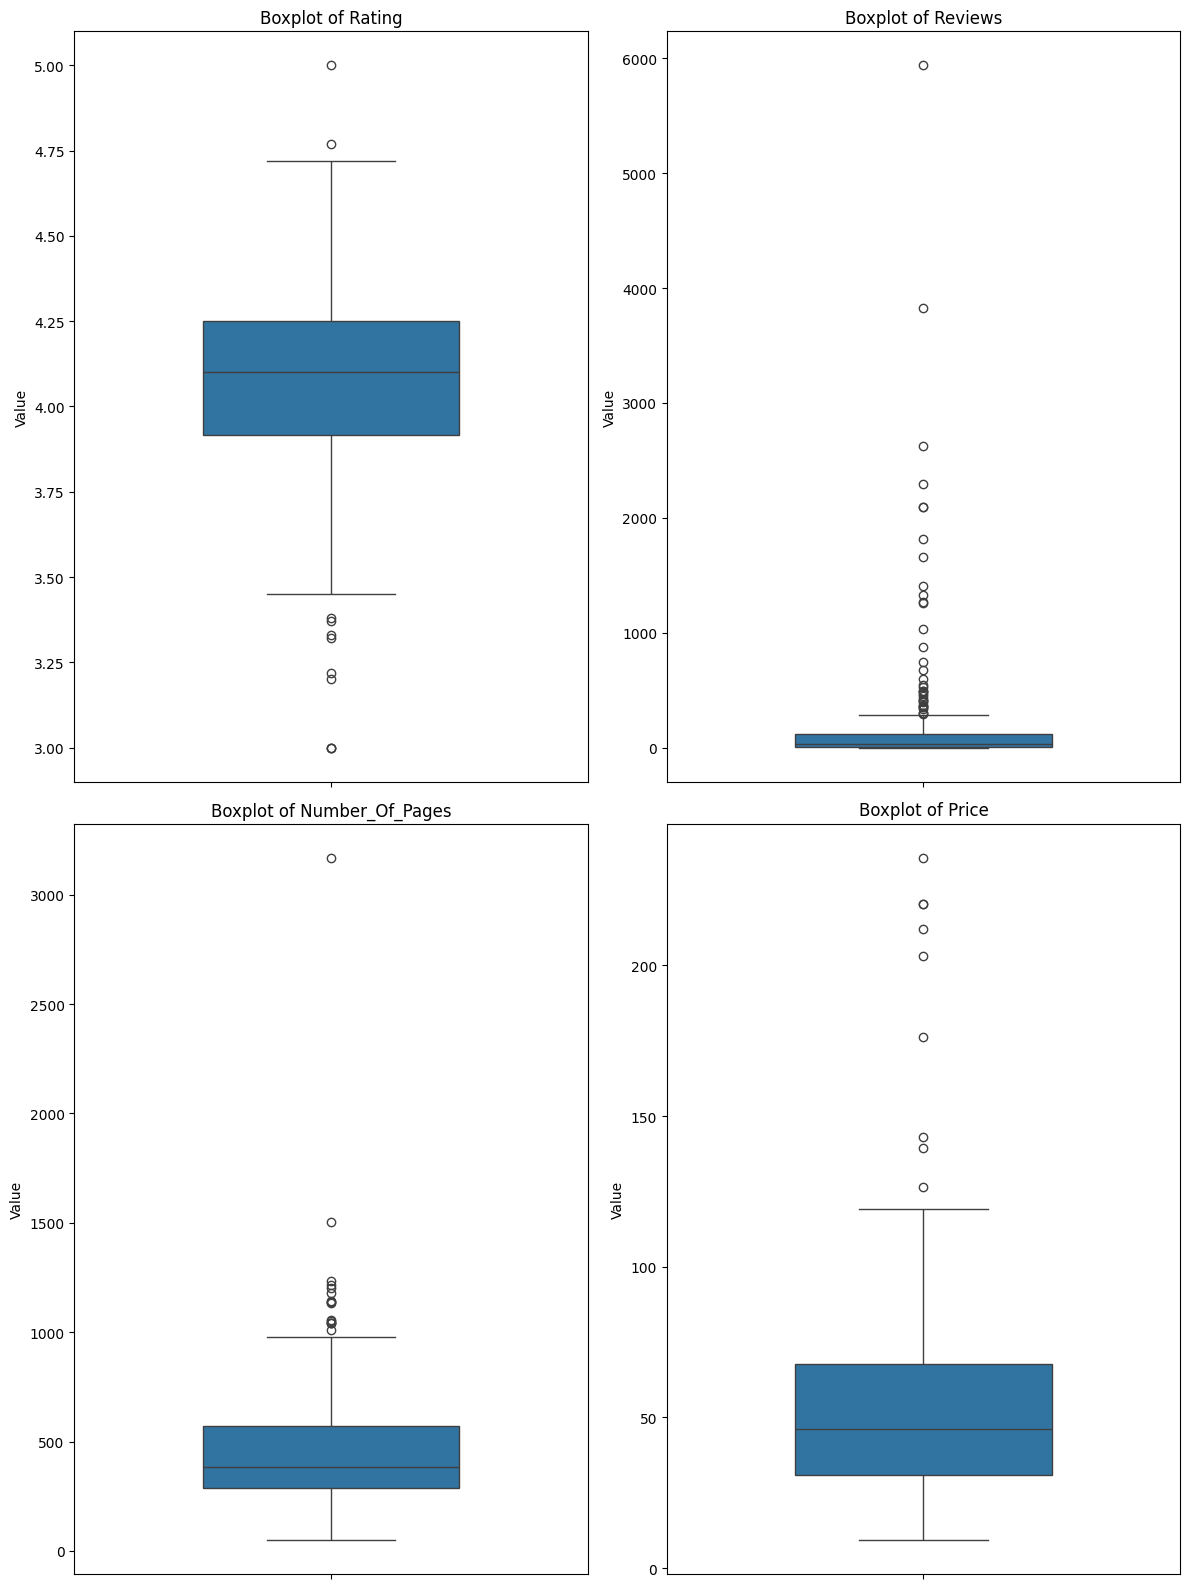

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv("prog_book.csv")

unique_types = data['Type'].unique()
type_mapping = {val: idx for idx, val in enumerate(unique_types)}
data['Type_Converted'] = data['Type'].map(type_mapping)

print(type_mapping)

# Define numerical features
numerical_features = ['Rating', 'Reviews', 'Number_Of_Pages', 'Price']

data[numerical_features] = data[numerical_features].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

# Create box plots for each numerical feature
plt.figure(figsize=(12, 16))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[feature], orient='v', width=0.5)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [73]:
# Identify outliers using the IQR method
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f'{feature} Outliers')
    print()
    for index, row in outliers.iterrows():
        print(f'Index: {index}, {feature}: {row[feature]}')

    print()


Rating Outliers

Index: 2, Rating: 3.33
Index: 24, Rating: 3.2
Index: 54, Rating: 5.0
Index: 60, Rating: 3.32
Index: 86, Rating: 3.22
Index: 94, Rating: 3.38
Index: 132, Rating: 3.37
Index: 177, Rating: 3.0
Index: 182, Rating: 3.0
Index: 187, Rating: 3.0
Index: 269, Rating: 4.77

Reviews Outliers

Index: 0, Reviews: 3829
Index: 1, Reviews: 1406
Index: 3, Reviews: 1658
Index: 4, Reviews: 1325
Index: 6, Reviews: 5938
Index: 7, Reviews: 1817
Index: 8, Reviews: 2093
Index: 11, Reviews: 481
Index: 13, Reviews: 1255
Index: 14, Reviews: 593
Index: 15, Reviews: 417
Index: 18, Reviews: 370
Index: 19, Reviews: 2092
Index: 21, Reviews: 676
Index: 23, Reviews: 1268
Index: 26, Reviews: 491
Index: 32, Reviews: 356
Index: 34, Reviews: 295
Index: 38, Reviews: 530
Index: 40, Reviews: 336
Index: 45, Reviews: 2629
Index: 52, Reviews: 1035
Index: 53, Reviews: 302
Index: 67, Reviews: 547
Index: 90, Reviews: 2290
Index: 109, Reviews: 496
Index: 119, Reviews: 395
Index: 122, Reviews: 746
Index: 123, Reviews:

## Task 2: Multivariate Outlier detection

<ipython-input-76-fc20bd18ad1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


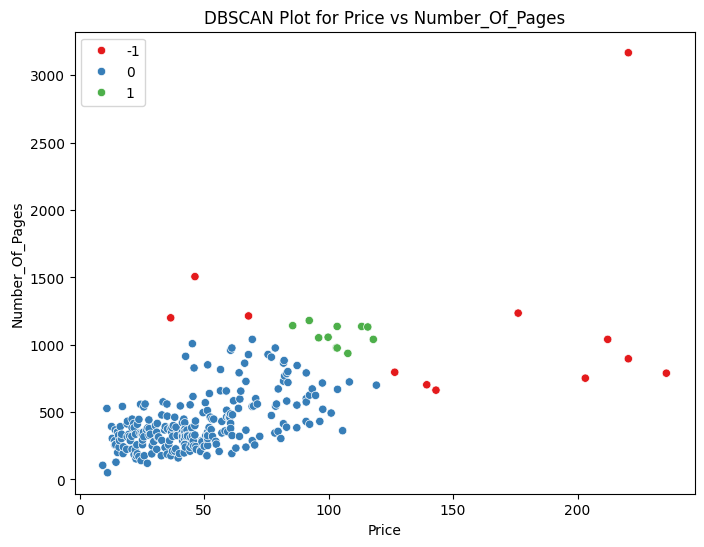

Outliers in Price vs Number_Of_Pages:
Index: 86, Price: 36.61764706, Number_Of_Pages: 1200.0
Index: 137, Price: 46.35882353, Number_Of_Pages: 1506.0
Index: 203, Price: 67.87352941, Number_Of_Pages: 1214.0
Index: 262, Price: 126.5794118, Number_Of_Pages: 796.0
Index: 263, Price: 139.4352941, Number_Of_Pages: 703.0
Index: 264, Price: 143.1382353, Number_Of_Pages: 663.0
Index: 265, Price: 176.1441176, Number_Of_Pages: 1235.0
Index: 266, Price: 203.1088235, Number_Of_Pages: 752.0
Index: 267, Price: 212.0970588, Number_Of_Pages: 1040.0
Index: 268, Price: 220.3852941, Number_Of_Pages: 896.0
Index: 269, Price: 220.3852941, Number_Of_Pages: 3168.0
Index: 270, Price: 235.65, Number_Of_Pages: 789.0



<ipython-input-76-fc20bd18ad1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


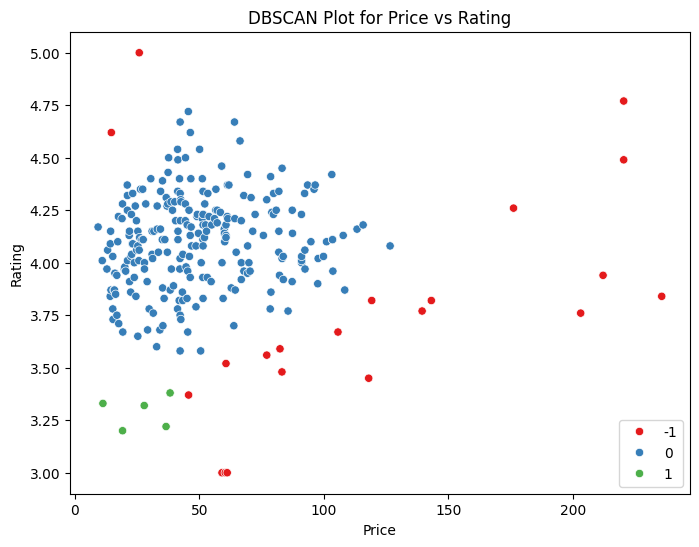

Outliers in Price vs Rating:
Index: 9, Price: 14.64117647, Rating: 4.62
Index: 54, Price: 25.85588235, Rating: 5.0
Index: 132, Price: 45.66470588, Rating: 3.37
Index: 177, Price: 59.08235294, Rating: 3.0
Index: 182, Price: 60.39117647, Rating: 3.0
Index: 184, Price: 60.68235294, Rating: 3.52
Index: 187, Price: 61.16764706, Rating: 3.0
Index: 213, Price: 77.05294118, Rating: 3.56
Index: 226, Price: 82.36764706, Rating: 3.59
Index: 227, Price: 83.15, Rating: 3.48
Index: 255, Price: 105.65, Rating: 3.67
Index: 260, Price: 117.9882353, Rating: 3.45
Index: 261, Price: 119.2029412, Rating: 3.82
Index: 263, Price: 139.4352941, Rating: 3.77
Index: 264, Price: 143.1382353, Rating: 3.82
Index: 265, Price: 176.1441176, Rating: 4.26
Index: 266, Price: 203.1088235, Rating: 3.76
Index: 267, Price: 212.0970588, Rating: 3.94
Index: 268, Price: 220.3852941, Rating: 4.49
Index: 269, Price: 220.3852941, Rating: 4.77
Index: 270, Price: 235.65, Rating: 3.84



<ipython-input-76-fc20bd18ad1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


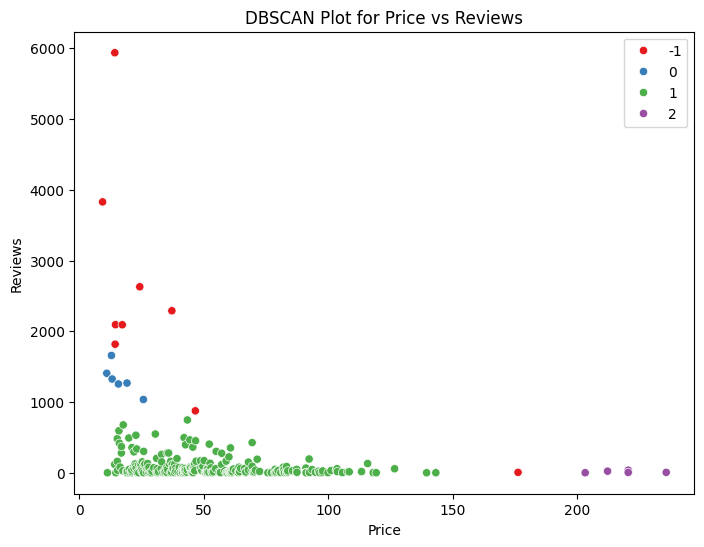

Outliers in Price vs Reviews:
Index: 0, Price: 9.323529412, Reviews: 3829.0
Index: 6, Price: 14.23235294, Reviews: 5938.0
Index: 7, Price: 14.36470588, Reviews: 1817.0
Index: 8, Price: 14.50294118, Reviews: 2093.0
Index: 19, Price: 17.22941176, Reviews: 2092.0
Index: 45, Price: 24.25882353, Reviews: 2629.0
Index: 90, Price: 37.14117647, Reviews: 2290.0
Index: 138, Price: 46.57352941, Reviews: 875.0
Index: 265, Price: 176.1441176, Reviews: 5.0



<ipython-input-76-fc20bd18ad1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


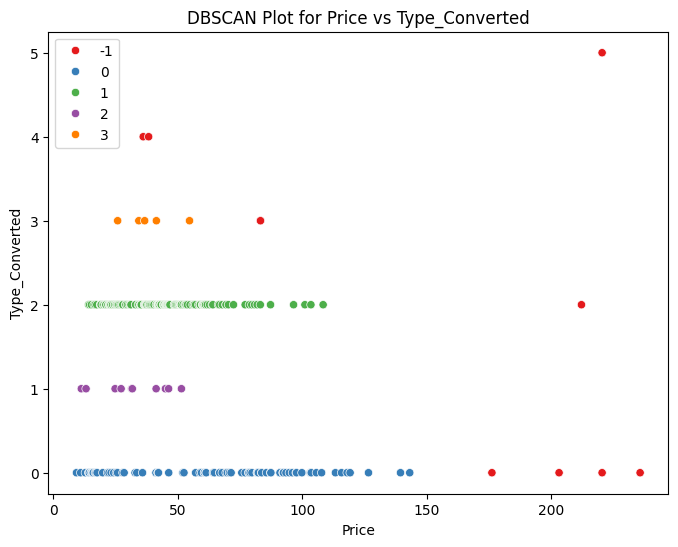

Outliers in Price vs Type_Converted:
Index: 85, Price: 36.12647059, Type_Converted: 4.0
Index: 95, Price: 38.29705882, Type_Converted: 4.0
Index: 228, Price: 83.20294118, Type_Converted: 3.0
Index: 229, Price: 83.21176471, Type_Converted: 3.0
Index: 265, Price: 176.1441176, Type_Converted: 0.0
Index: 266, Price: 203.1088235, Type_Converted: 0.0
Index: 267, Price: 212.0970588, Type_Converted: 2.0
Index: 268, Price: 220.3852941, Type_Converted: 5.0
Index: 269, Price: 220.3852941, Type_Converted: 0.0
Index: 270, Price: 235.65, Type_Converted: 0.0



<ipython-input-76-fc20bd18ad1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


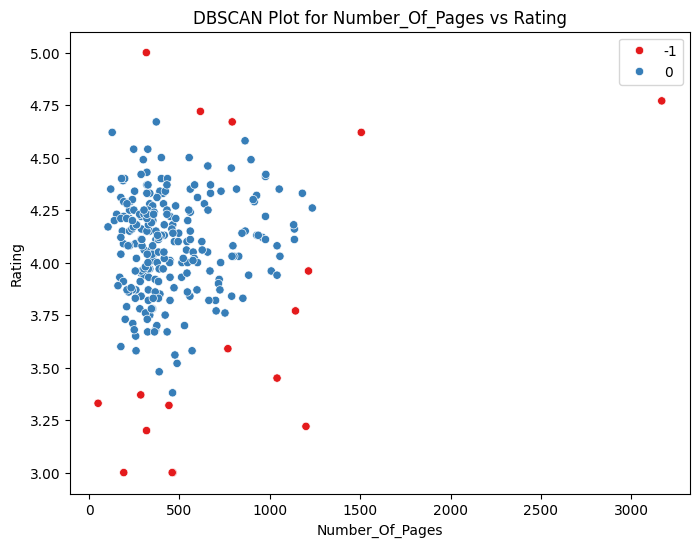

Outliers in Number_Of_Pages vs Rating:
Index: 2, Number_Of_Pages: 50.0, Rating: 3.33
Index: 24, Number_Of_Pages: 318.0, Rating: 3.2
Index: 54, Number_Of_Pages: 317.0, Rating: 5.0
Index: 60, Number_Of_Pages: 442.0, Rating: 3.32
Index: 86, Number_Of_Pages: 1200.0, Rating: 3.22
Index: 131, Number_Of_Pages: 616.0, Rating: 4.72
Index: 132, Number_Of_Pages: 286.0, Rating: 3.37
Index: 137, Number_Of_Pages: 1506.0, Rating: 4.62
Index: 177, Number_Of_Pages: 464.0, Rating: 3.0
Index: 182, Number_Of_Pages: 460.0, Rating: 3.0
Index: 187, Number_Of_Pages: 192.0, Rating: 3.0
Index: 194, Number_Of_Pages: 792.0, Rating: 4.67
Index: 203, Number_Of_Pages: 1214.0, Rating: 3.96
Index: 226, Number_Of_Pages: 768.0, Rating: 3.59
Index: 232, Number_Of_Pages: 1142.0, Rating: 3.77
Index: 260, Number_Of_Pages: 1040.0, Rating: 3.45
Index: 269, Number_Of_Pages: 3168.0, Rating: 4.77



<ipython-input-76-fc20bd18ad1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


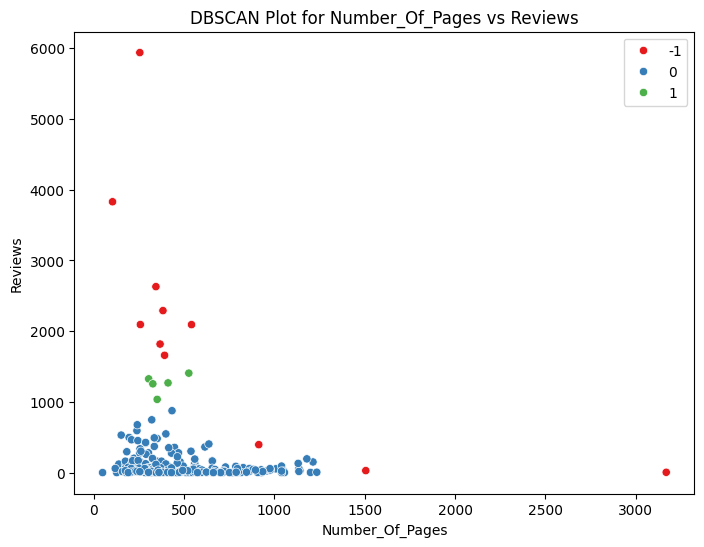

Outliers in Number_Of_Pages vs Reviews:
Index: 0, Number_Of_Pages: 105, Reviews: 3829
Index: 3, Number_Of_Pages: 393, Reviews: 1658
Index: 6, Number_Of_Pages: 256, Reviews: 5938
Index: 7, Number_Of_Pages: 368, Reviews: 1817
Index: 8, Number_Of_Pages: 259, Reviews: 2093
Index: 19, Number_Of_Pages: 542, Reviews: 2092
Index: 45, Number_Of_Pages: 345, Reviews: 2629
Index: 90, Number_Of_Pages: 384, Reviews: 2290
Index: 119, Number_Of_Pages: 914, Reviews: 395
Index: 137, Number_Of_Pages: 1506, Reviews: 28
Index: 269, Number_Of_Pages: 3168, Reviews: 4



<ipython-input-76-fc20bd18ad1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


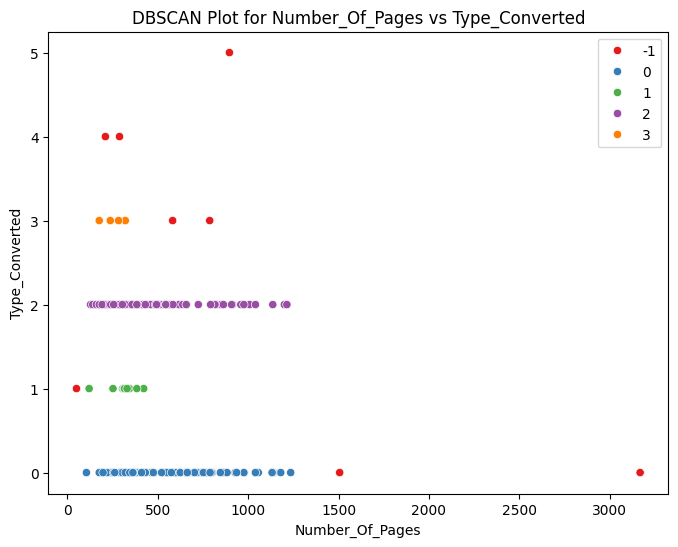

Outliers in Number_Of_Pages vs Type_Converted:
Index: 2, Number_Of_Pages: 50, Type_Converted: 1
Index: 85, Number_Of_Pages: 288, Type_Converted: 4
Index: 95, Number_Of_Pages: 210, Type_Converted: 4
Index: 137, Number_Of_Pages: 1506, Type_Converted: 0
Index: 228, Number_Of_Pages: 787, Type_Converted: 3
Index: 229, Number_Of_Pages: 582, Type_Converted: 3
Index: 268, Number_Of_Pages: 896, Type_Converted: 5
Index: 269, Number_Of_Pages: 3168, Type_Converted: 0



<ipython-input-76-fc20bd18ad1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


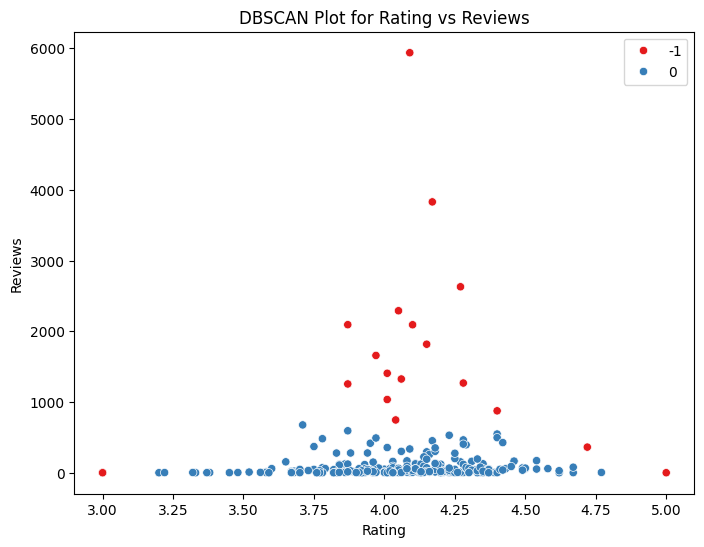

Outliers in Rating vs Reviews:
Index: 0, Rating: 4.17, Reviews: 3829.0
Index: 1, Rating: 4.01, Reviews: 1406.0
Index: 3, Rating: 3.97, Reviews: 1658.0
Index: 4, Rating: 4.06, Reviews: 1325.0
Index: 6, Rating: 4.09, Reviews: 5938.0
Index: 7, Rating: 4.15, Reviews: 1817.0
Index: 8, Rating: 3.87, Reviews: 2093.0
Index: 13, Rating: 3.87, Reviews: 1255.0
Index: 19, Rating: 4.1, Reviews: 2092.0
Index: 23, Rating: 4.28, Reviews: 1268.0
Index: 45, Rating: 4.27, Reviews: 2629.0
Index: 52, Rating: 4.01, Reviews: 1035.0
Index: 54, Rating: 5.0, Reviews: 0.0
Index: 90, Rating: 4.05, Reviews: 2290.0
Index: 122, Rating: 4.04, Reviews: 746.0
Index: 131, Rating: 4.72, Reviews: 362.0
Index: 138, Rating: 4.4, Reviews: 875.0
Index: 177, Rating: 3.0, Reviews: 0.0
Index: 182, Rating: 3.0, Reviews: 0.0
Index: 187, Rating: 3.0, Reviews: 0.0



<ipython-input-76-fc20bd18ad1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


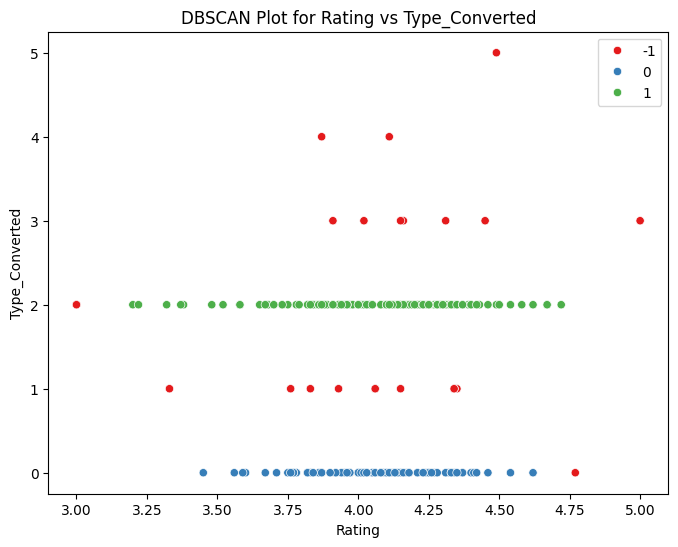

Outliers in Rating vs Type_Converted:
Index: 2, Rating: 3.33, Type_Converted: 1.0
Index: 4, Rating: 4.06, Type_Converted: 1.0
Index: 48, Rating: 4.06, Type_Converted: 1.0
Index: 54, Rating: 5.0, Type_Converted: 3.0
Index: 58, Rating: 4.35, Type_Converted: 1.0
Index: 71, Rating: 3.76, Type_Converted: 1.0
Index: 72, Rating: 4.15, Type_Converted: 1.0
Index: 78, Rating: 4.16, Type_Converted: 3.0
Index: 85, Rating: 4.11, Type_Converted: 4.0
Index: 88, Rating: 4.31, Type_Converted: 3.0
Index: 95, Rating: 3.87, Type_Converted: 4.0
Index: 104, Rating: 4.34, Type_Converted: 1.0
Index: 107, Rating: 4.15, Type_Converted: 3.0
Index: 127, Rating: 3.83, Type_Converted: 1.0
Index: 136, Rating: 3.93, Type_Converted: 1.0
Index: 153, Rating: 4.34, Type_Converted: 1.0
Index: 166, Rating: 3.91, Type_Converted: 3.0
Index: 177, Rating: 3.0, Type_Converted: 2.0
Index: 182, Rating: 3.0, Type_Converted: 2.0
Index: 187, Rating: 3.0, Type_Converted: 2.0
Index: 228, Rating: 4.45, Type_Converted: 3.0
Index: 229, R

<ipython-input-76-fc20bd18ad1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


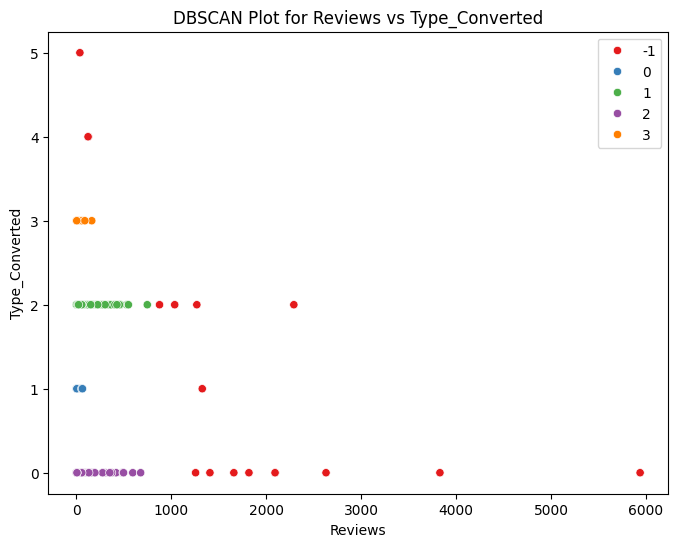

Outliers in Reviews vs Type_Converted:
Index: 0, Reviews: 3829, Type_Converted: 0
Index: 1, Reviews: 1406, Type_Converted: 0
Index: 3, Reviews: 1658, Type_Converted: 0
Index: 4, Reviews: 1325, Type_Converted: 1
Index: 6, Reviews: 5938, Type_Converted: 0
Index: 7, Reviews: 1817, Type_Converted: 0
Index: 8, Reviews: 2093, Type_Converted: 0
Index: 13, Reviews: 1255, Type_Converted: 0
Index: 19, Reviews: 2092, Type_Converted: 0
Index: 23, Reviews: 1268, Type_Converted: 2
Index: 45, Reviews: 2629, Type_Converted: 0
Index: 52, Reviews: 1035, Type_Converted: 2
Index: 85, Reviews: 125, Type_Converted: 4
Index: 90, Reviews: 2290, Type_Converted: 2
Index: 95, Reviews: 122, Type_Converted: 4
Index: 138, Reviews: 875, Type_Converted: 2
Index: 268, Reviews: 36, Type_Converted: 5



In [76]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select the specified columns
selected_columns = ["Price", "Number_Of_Pages", "Rating", "Reviews", "Type_Converted"]

# Pairwise bivariate analysis using DBSCAN
for i in range(len(selected_columns)):
    for j in range(i+1, len(selected_columns)):
        feature1 = selected_columns[i]
        feature2 = selected_columns[j]

        # Create a DataFrame with the two selected features
        features_df = data[[feature1, feature2]]
        features_df.dropna(inplace=True)

        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features_df)

        # Fit DBSCAN
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        dbscan.fit(features_scaled)

        # Plot the DBSCAN clusters
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=feature1, y=feature2, data=features_df, hue=dbscan.labels_, palette='Set1', legend="full")
        plt.title(f'DBSCAN Plot for {feature1} vs {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

        # Identify outliers
        outliers_indices = features_df.index[dbscan.labels_ == -1]
        outliers_data = features_df.loc[outliers_indices]

        print(f'Outliers in {feature1} vs {feature2}:')
        for index, row in outliers_data.iterrows():
          print(f'Index: {index}, {feature1}: {row[feature1]}, {feature2}: {row[feature2]}')
        print()

<ipython-input-79-91402363abaf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


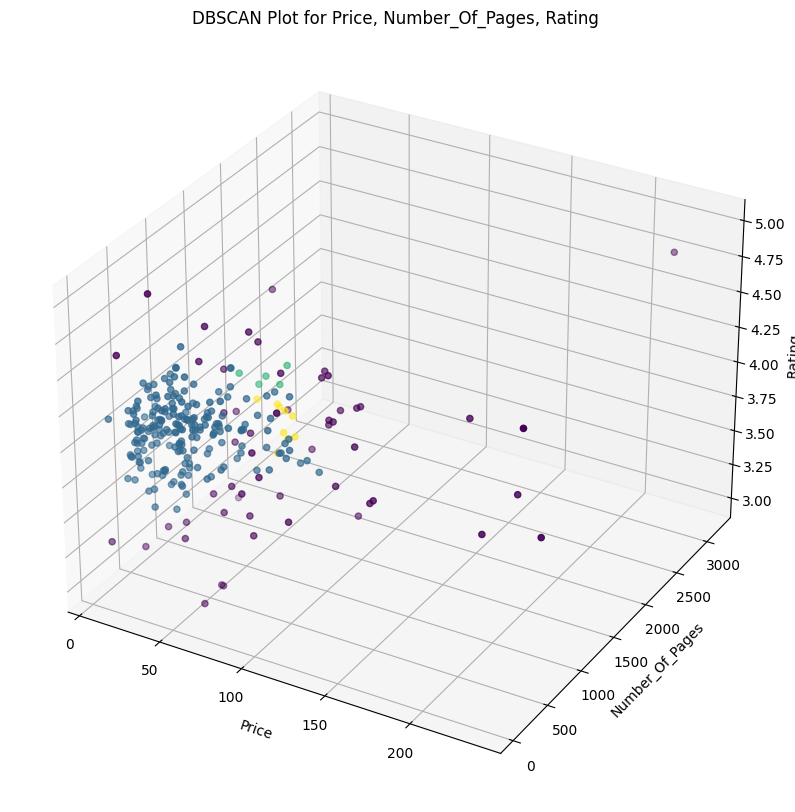

Outliers in Price, Number_Of_Pages, Rating:
Index: 2, Price: 11.26764706, Number_Of_Pages: 50.0, Rating: 3.33
Index: 9, Price: 14.64117647, Number_Of_Pages: 128.0, Rating: 4.62
Index: 24, Price: 19.15294118, Number_Of_Pages: 318.0, Rating: 3.2
Index: 54, Price: 25.85588235, Number_Of_Pages: 317.0, Rating: 5.0
Index: 60, Price: 27.85, Number_Of_Pages: 442.0, Rating: 3.32
Index: 86, Price: 36.61764706, Number_Of_Pages: 1200.0, Rating: 3.22
Index: 94, Price: 38.23529412, Number_Of_Pages: 462.0, Rating: 3.38
Index: 119, Price: 42.61470588, Number_Of_Pages: 914.0, Rating: 4.29
Index: 125, Price: 44.42647059, Number_Of_Pages: 554.0, Rating: 4.5
Index: 129, Price: 45.32647059, Number_Of_Pages: 1008.0, Rating: 3.96
Index: 131, Price: 45.56176471, Number_Of_Pages: 616.0, Rating: 4.72
Index: 132, Price: 45.66470588, Number_Of_Pages: 286.0, Rating: 3.37
Index: 134, Price: 46.0, Number_Of_Pages: 828.0, Rating: 4.03
Index: 137, Price: 46.35882353, Number_Of_Pages: 1506.0, Rating: 4.62
Index: 147, P

<ipython-input-79-91402363abaf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


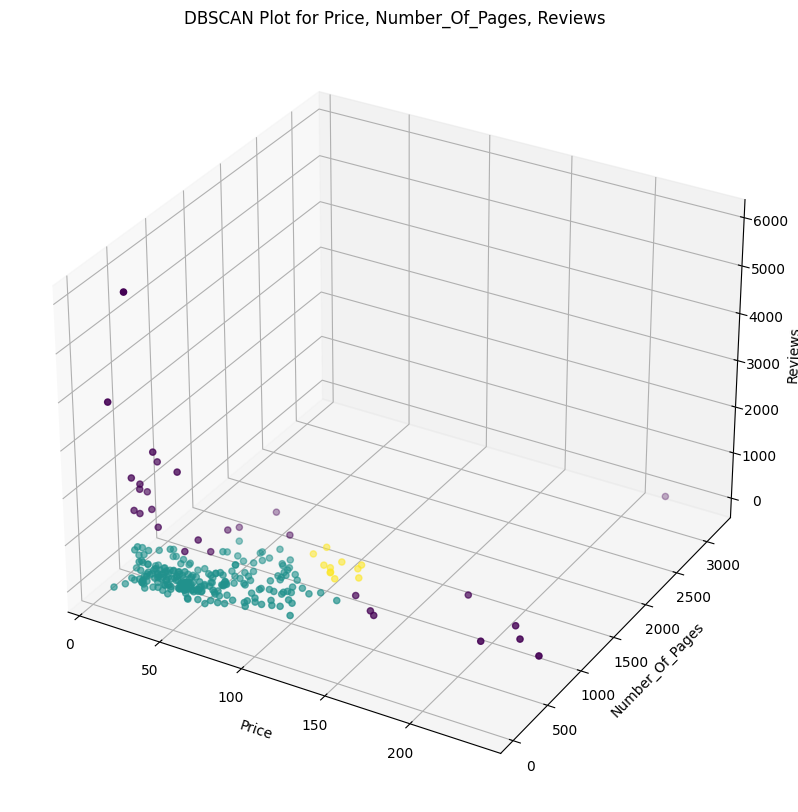

Outliers in Price, Number_Of_Pages, Reviews:
Index: 0, Price: 9.323529412, Number_Of_Pages: 105.0, Reviews: 3829.0
Index: 1, Price: 11.0, Number_Of_Pages: 527.0, Reviews: 1406.0
Index: 3, Price: 12.87352941, Number_Of_Pages: 393.0, Reviews: 1658.0
Index: 4, Price: 13.16470588, Number_Of_Pages: 305.0, Reviews: 1325.0
Index: 6, Price: 14.23235294, Number_Of_Pages: 256.0, Reviews: 5938.0
Index: 7, Price: 14.36470588, Number_Of_Pages: 368.0, Reviews: 1817.0
Index: 8, Price: 14.50294118, Number_Of_Pages: 259.0, Reviews: 2093.0
Index: 13, Price: 15.68235294, Number_Of_Pages: 328.0, Reviews: 1255.0
Index: 19, Price: 17.22941176, Number_Of_Pages: 542.0, Reviews: 2092.0
Index: 23, Price: 19.13235294, Number_Of_Pages: 412.0, Reviews: 1268.0
Index: 45, Price: 24.25882353, Number_Of_Pages: 345.0, Reviews: 2629.0
Index: 52, Price: 25.70294118, Number_Of_Pages: 352.0, Reviews: 1035.0
Index: 86, Price: 36.61764706, Number_Of_Pages: 1200.0, Reviews: 2.0
Index: 90, Price: 37.14117647, Number_Of_Pages: 

<ipython-input-79-91402363abaf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


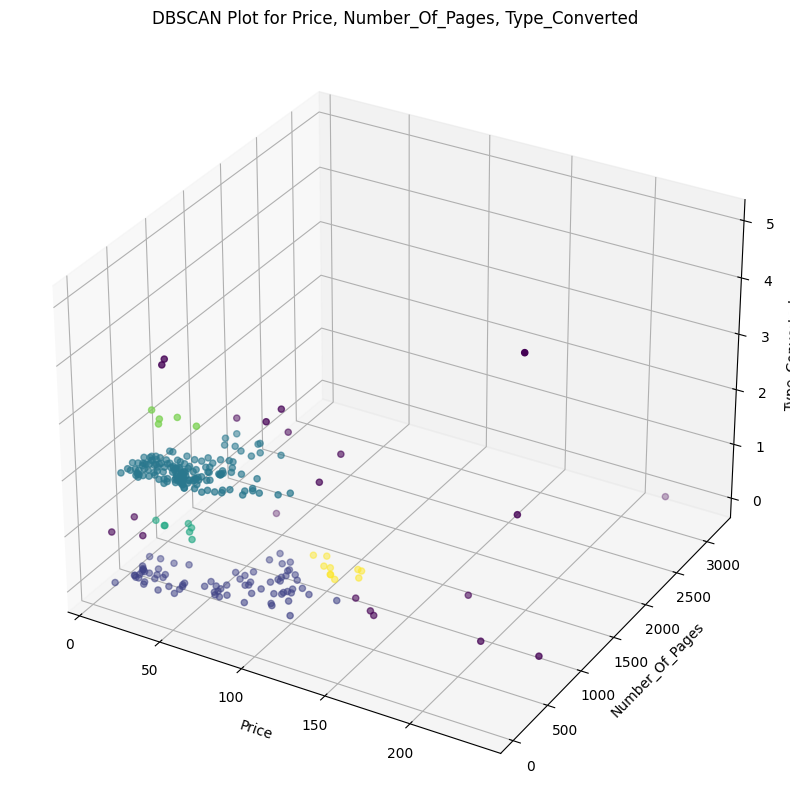

Outliers in Price, Number_Of_Pages, Type_Converted:
Index: 2, Price: 11.26764706, Number_Of_Pages: 50.0, Type_Converted: 1.0
Index: 4, Price: 13.16470588, Number_Of_Pages: 305.0, Type_Converted: 1.0
Index: 58, Price: 27.24411765, Number_Of_Pages: 120.0, Type_Converted: 1.0
Index: 85, Price: 36.12647059, Number_Of_Pages: 288.0, Type_Converted: 4.0
Index: 86, Price: 36.61764706, Number_Of_Pages: 1200.0, Type_Converted: 2.0
Index: 95, Price: 38.29705882, Number_Of_Pages: 210.0, Type_Converted: 4.0
Index: 137, Price: 46.35882353, Number_Of_Pages: 1506.0, Type_Converted: 0.0
Index: 203, Price: 67.87352941, Number_Of_Pages: 1214.0, Type_Converted: 2.0
Index: 228, Price: 83.20294118, Number_Of_Pages: 787.0, Type_Converted: 3.0
Index: 229, Price: 83.21176471, Number_Of_Pages: 582.0, Type_Converted: 3.0
Index: 253, Price: 103.4617647, Number_Of_Pages: 1136.0, Type_Converted: 2.0
Index: 257, Price: 108.3676471, Number_Of_Pages: 724.0, Type_Converted: 2.0
Index: 262, Price: 126.5794118, Number_Of

<ipython-input-79-91402363abaf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


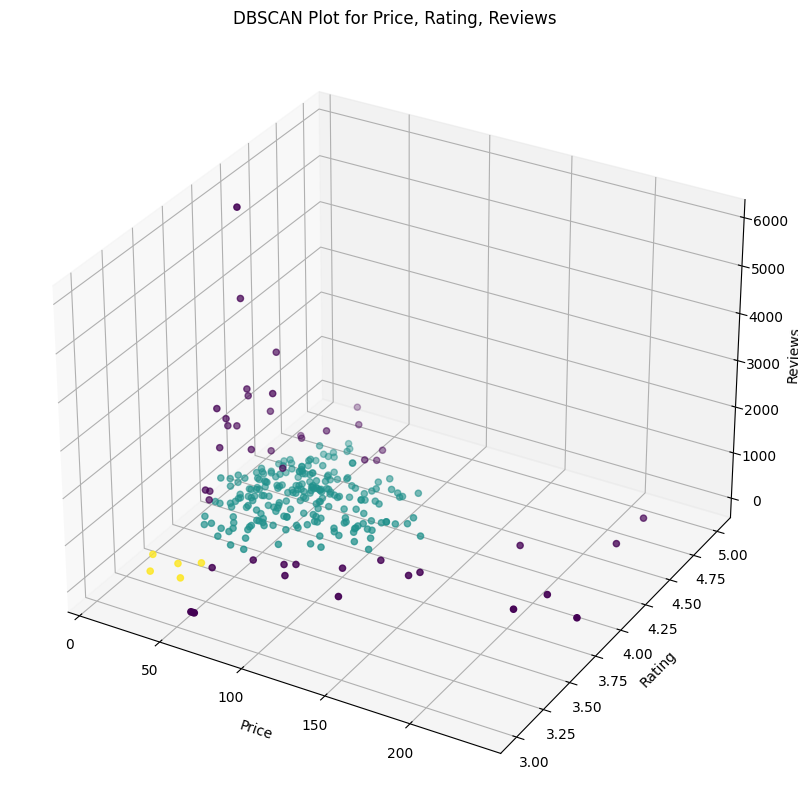

Outliers in Price, Rating, Reviews:
Index: 0, Price: 9.323529412, Rating: 4.17, Reviews: 3829.0
Index: 1, Price: 11.0, Rating: 4.01, Reviews: 1406.0
Index: 3, Price: 12.87352941, Rating: 3.97, Reviews: 1658.0
Index: 4, Price: 13.16470588, Rating: 4.06, Reviews: 1325.0
Index: 6, Price: 14.23235294, Rating: 4.09, Reviews: 5938.0
Index: 7, Price: 14.36470588, Rating: 4.15, Reviews: 1817.0
Index: 8, Price: 14.50294118, Rating: 3.87, Reviews: 2093.0
Index: 9, Price: 14.64117647, Rating: 4.62, Reviews: 0.0
Index: 11, Price: 15.22941176, Rating: 3.78, Reviews: 481.0
Index: 13, Price: 15.68235294, Rating: 3.87, Reviews: 1255.0
Index: 18, Price: 16.89117647, Rating: 3.75, Reviews: 370.0
Index: 19, Price: 17.22941176, Rating: 4.1, Reviews: 2092.0
Index: 21, Price: 17.62058824, Rating: 3.71, Reviews: 676.0
Index: 23, Price: 19.13235294, Rating: 4.28, Reviews: 1268.0
Index: 38, Price: 22.69411765, Rating: 4.23, Reviews: 530.0
Index: 45, Price: 24.25882353, Rating: 4.27, Reviews: 2629.0
Index: 52, 

<ipython-input-79-91402363abaf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


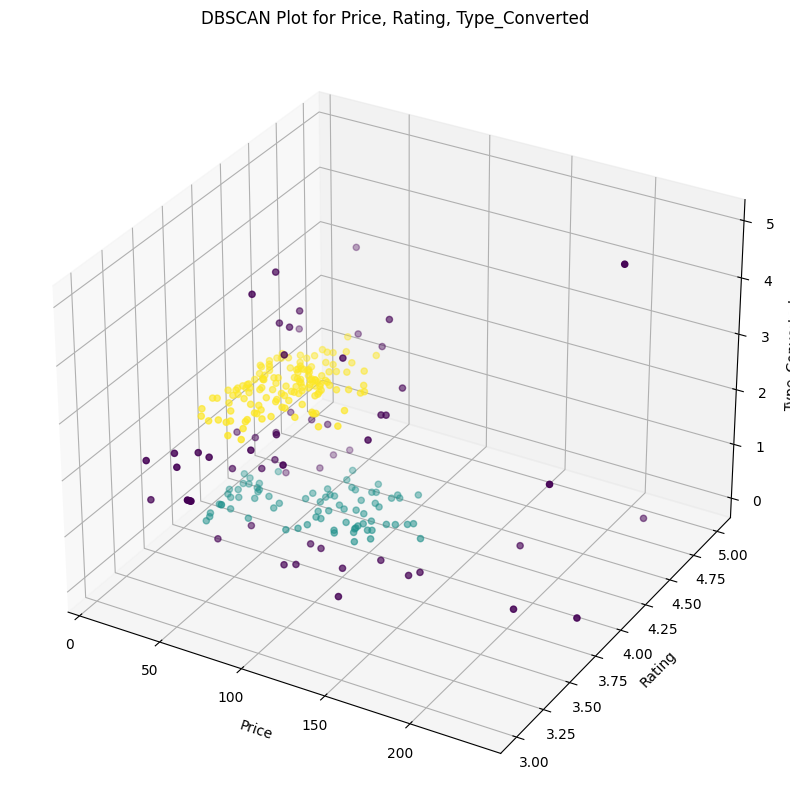

Outliers in Price, Rating, Type_Converted:
Index: 2, Price: 11.26764706, Rating: 3.33, Type_Converted: 1.0
Index: 4, Price: 13.16470588, Rating: 4.06, Type_Converted: 1.0
Index: 9, Price: 14.64117647, Rating: 4.62, Type_Converted: 2.0
Index: 24, Price: 19.15294118, Rating: 3.2, Type_Converted: 2.0
Index: 48, Price: 24.83235294, Rating: 4.06, Type_Converted: 1.0
Index: 54, Price: 25.85588235, Rating: 5.0, Type_Converted: 3.0
Index: 58, Price: 27.24411765, Rating: 4.35, Type_Converted: 1.0
Index: 60, Price: 27.85, Rating: 3.32, Type_Converted: 2.0
Index: 63, Price: 28.46470588, Rating: 4.28, Type_Converted: 0.0
Index: 71, Price: 31.48235294, Rating: 3.76, Type_Converted: 1.0
Index: 72, Price: 31.74705882, Rating: 4.15, Type_Converted: 1.0
Index: 73, Price: 32.84705882, Rating: 3.6, Type_Converted: 0.0
Index: 78, Price: 34.35588235, Rating: 4.16, Type_Converted: 3.0
Index: 85, Price: 36.12647059, Rating: 4.11, Type_Converted: 4.0
Index: 86, Price: 36.61764706, Rating: 3.22, Type_Converted

<ipython-input-79-91402363abaf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


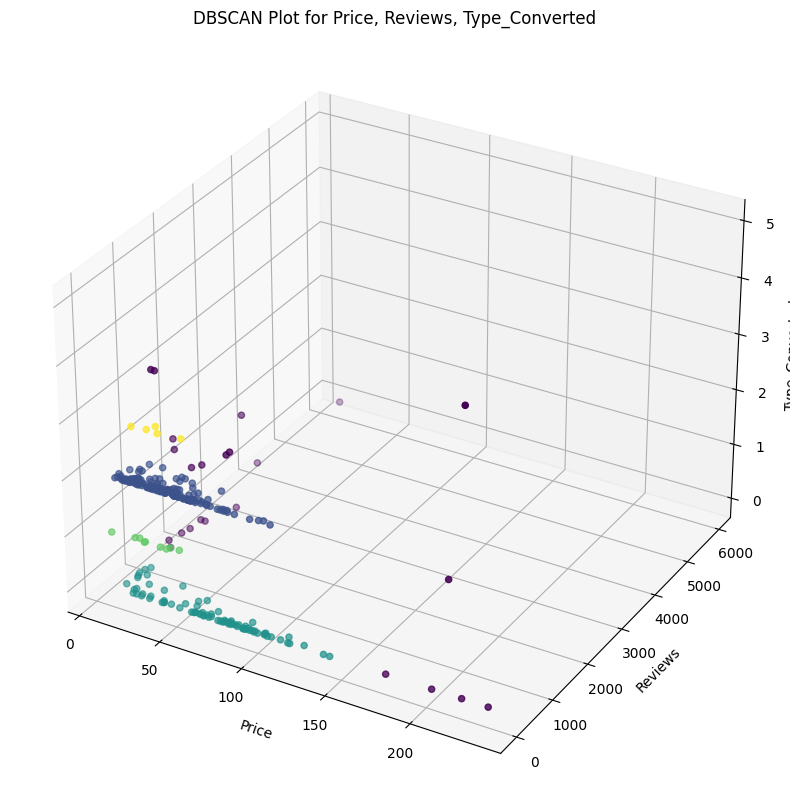

Outliers in Price, Reviews, Type_Converted:
Index: 0, Price: 9.323529412, Reviews: 3829.0, Type_Converted: 0.0
Index: 1, Price: 11.0, Reviews: 1406.0, Type_Converted: 0.0
Index: 3, Price: 12.87352941, Reviews: 1658.0, Type_Converted: 0.0
Index: 4, Price: 13.16470588, Reviews: 1325.0, Type_Converted: 1.0
Index: 6, Price: 14.23235294, Reviews: 5938.0, Type_Converted: 0.0
Index: 7, Price: 14.36470588, Reviews: 1817.0, Type_Converted: 0.0
Index: 8, Price: 14.50294118, Reviews: 2093.0, Type_Converted: 0.0
Index: 13, Price: 15.68235294, Reviews: 1255.0, Type_Converted: 0.0
Index: 19, Price: 17.22941176, Reviews: 2092.0, Type_Converted: 0.0
Index: 23, Price: 19.13235294, Reviews: 1268.0, Type_Converted: 2.0
Index: 45, Price: 24.25882353, Reviews: 2629.0, Type_Converted: 0.0
Index: 52, Price: 25.70294118, Reviews: 1035.0, Type_Converted: 2.0
Index: 85, Price: 36.12647059, Reviews: 125.0, Type_Converted: 4.0
Index: 90, Price: 37.14117647, Reviews: 2290.0, Type_Converted: 2.0
Index: 95, Price: 3

<ipython-input-79-91402363abaf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


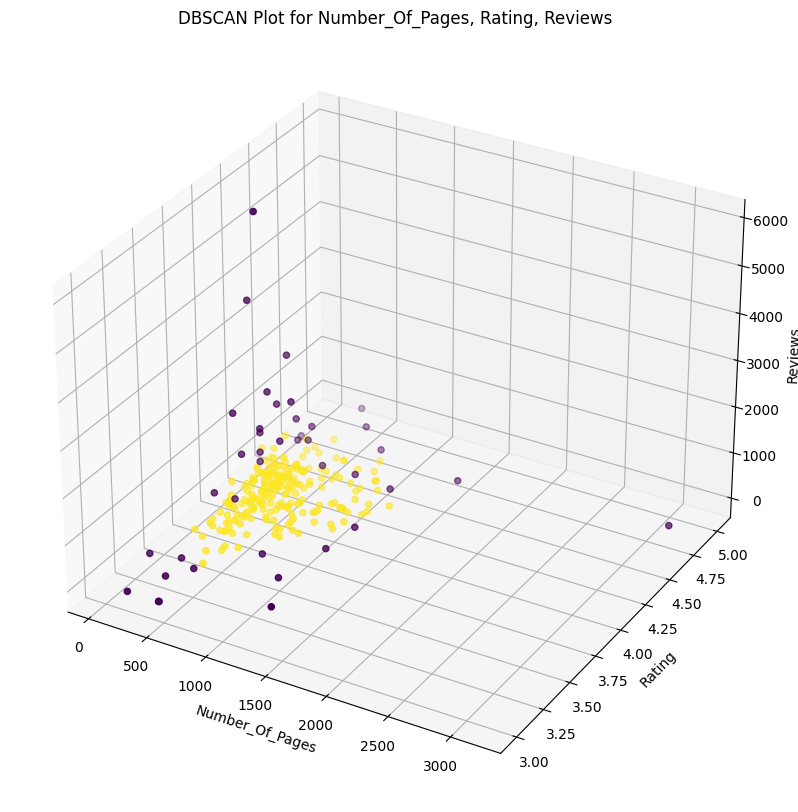

Outliers in Number_Of_Pages, Rating, Reviews:
Index: 0, Number_Of_Pages: 105.0, Rating: 4.17, Reviews: 3829.0
Index: 1, Number_Of_Pages: 527.0, Rating: 4.01, Reviews: 1406.0
Index: 2, Number_Of_Pages: 50.0, Rating: 3.33, Reviews: 0.0
Index: 3, Number_Of_Pages: 393.0, Rating: 3.97, Reviews: 1658.0
Index: 4, Number_Of_Pages: 305.0, Rating: 4.06, Reviews: 1325.0
Index: 6, Number_Of_Pages: 256.0, Rating: 4.09, Reviews: 5938.0
Index: 7, Number_Of_Pages: 368.0, Rating: 4.15, Reviews: 1817.0
Index: 8, Number_Of_Pages: 259.0, Rating: 3.87, Reviews: 2093.0
Index: 9, Number_Of_Pages: 128.0, Rating: 4.62, Reviews: 0.0
Index: 11, Number_Of_Pages: 352.0, Rating: 3.78, Reviews: 481.0
Index: 13, Number_Of_Pages: 328.0, Rating: 3.87, Reviews: 1255.0
Index: 19, Number_Of_Pages: 542.0, Rating: 4.1, Reviews: 2092.0
Index: 21, Number_Of_Pages: 242.0, Rating: 3.71, Reviews: 676.0
Index: 23, Number_Of_Pages: 412.0, Rating: 4.28, Reviews: 1268.0
Index: 24, Number_Of_Pages: 318.0, Rating: 3.2, Reviews: 0.0
In

<ipython-input-79-91402363abaf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


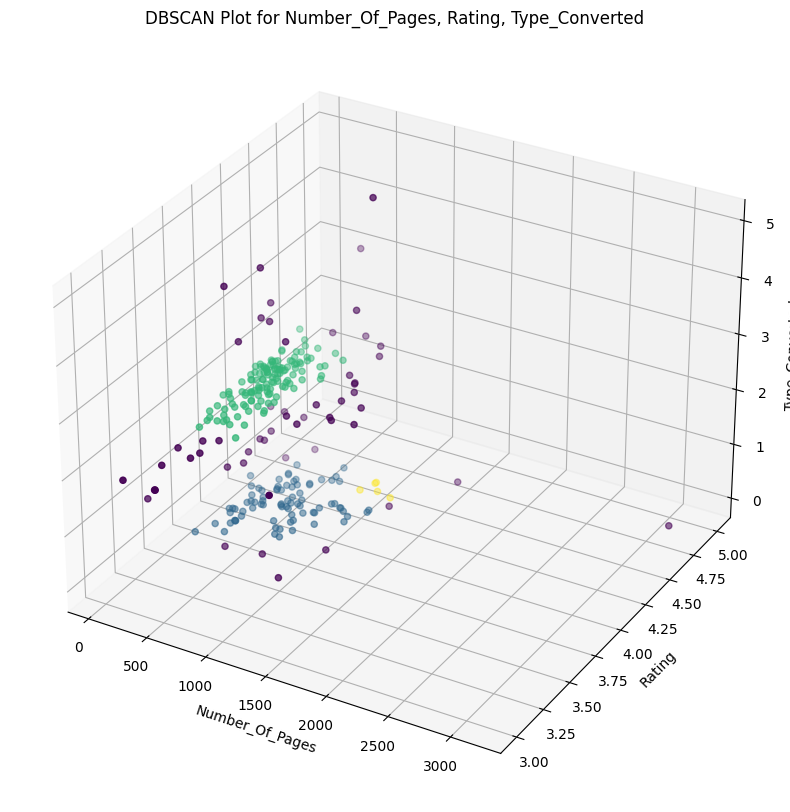

Outliers in Number_Of_Pages, Rating, Type_Converted:
Index: 2, Number_Of_Pages: 50.0, Rating: 3.33, Type_Converted: 1.0
Index: 4, Number_Of_Pages: 305.0, Rating: 4.06, Type_Converted: 1.0
Index: 24, Number_Of_Pages: 318.0, Rating: 3.2, Type_Converted: 2.0
Index: 48, Number_Of_Pages: 343.0, Rating: 4.06, Type_Converted: 1.0
Index: 54, Number_Of_Pages: 317.0, Rating: 5.0, Type_Converted: 3.0
Index: 58, Number_Of_Pages: 120.0, Rating: 4.35, Type_Converted: 1.0
Index: 60, Number_Of_Pages: 442.0, Rating: 3.32, Type_Converted: 2.0
Index: 71, Number_Of_Pages: 312.0, Rating: 3.76, Type_Converted: 1.0
Index: 72, Number_Of_Pages: 316.0, Rating: 4.15, Type_Converted: 1.0
Index: 78, Number_Of_Pages: 237.0, Rating: 4.16, Type_Converted: 3.0
Index: 85, Number_Of_Pages: 288.0, Rating: 4.11, Type_Converted: 4.0
Index: 86, Number_Of_Pages: 1200.0, Rating: 3.22, Type_Converted: 2.0
Index: 88, Number_Of_Pages: 176.0, Rating: 4.31, Type_Converted: 3.0
Index: 94, Number_Of_Pages: 462.0, Rating: 3.38, Type_

<ipython-input-79-91402363abaf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


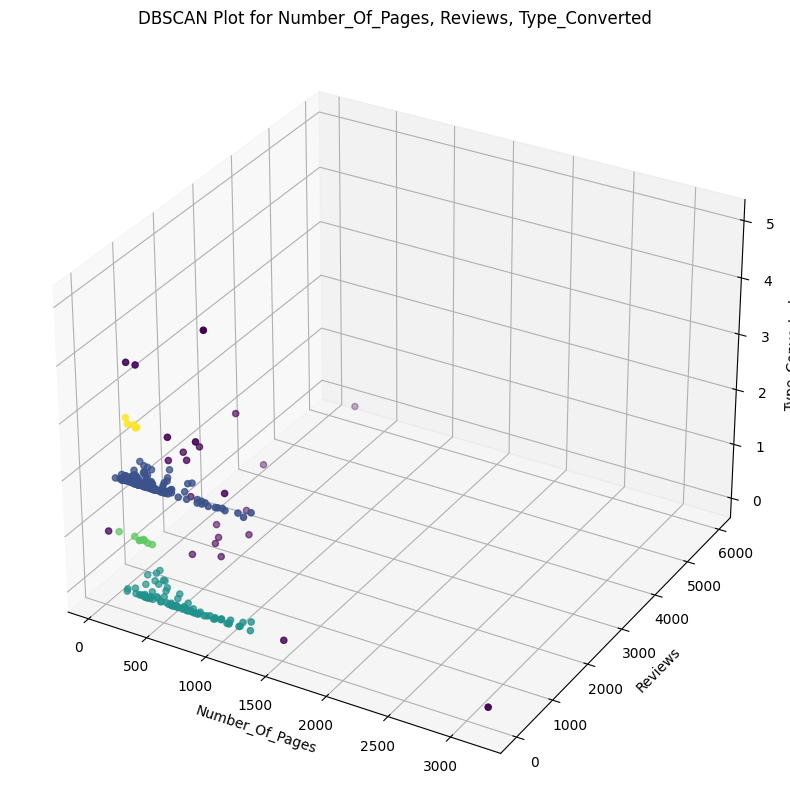

Outliers in Number_Of_Pages, Reviews, Type_Converted:
Index: 0, Number_Of_Pages: 105, Reviews: 3829, Type_Converted: 0
Index: 1, Number_Of_Pages: 527, Reviews: 1406, Type_Converted: 0
Index: 2, Number_Of_Pages: 50, Reviews: 0, Type_Converted: 1
Index: 3, Number_Of_Pages: 393, Reviews: 1658, Type_Converted: 0
Index: 4, Number_Of_Pages: 305, Reviews: 1325, Type_Converted: 1
Index: 6, Number_Of_Pages: 256, Reviews: 5938, Type_Converted: 0
Index: 7, Number_Of_Pages: 368, Reviews: 1817, Type_Converted: 0
Index: 8, Number_Of_Pages: 259, Reviews: 2093, Type_Converted: 0
Index: 13, Number_Of_Pages: 328, Reviews: 1255, Type_Converted: 0
Index: 19, Number_Of_Pages: 542, Reviews: 2092, Type_Converted: 0
Index: 23, Number_Of_Pages: 412, Reviews: 1268, Type_Converted: 2
Index: 45, Number_Of_Pages: 345, Reviews: 2629, Type_Converted: 0
Index: 52, Number_Of_Pages: 352, Reviews: 1035, Type_Converted: 2
Index: 85, Number_Of_Pages: 288, Reviews: 125, Type_Converted: 4
Index: 90, Number_Of_Pages: 384, Re

<ipython-input-79-91402363abaf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.dropna(inplace=True)


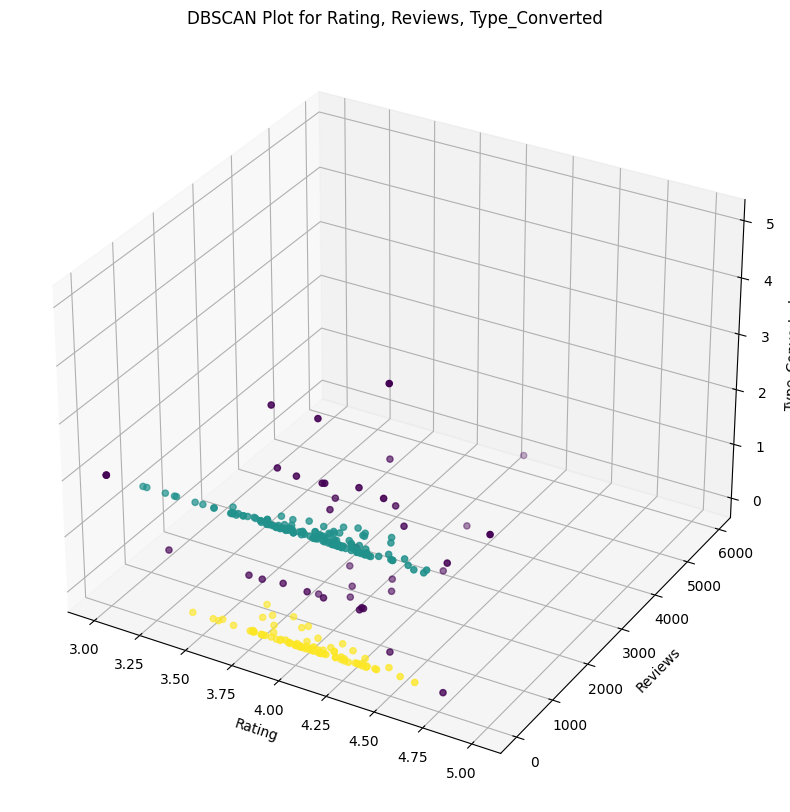

Outliers in Rating, Reviews, Type_Converted:
Index: 0, Rating: 4.17, Reviews: 3829.0, Type_Converted: 0.0
Index: 1, Rating: 4.01, Reviews: 1406.0, Type_Converted: 0.0
Index: 2, Rating: 3.33, Reviews: 0.0, Type_Converted: 1.0
Index: 3, Rating: 3.97, Reviews: 1658.0, Type_Converted: 0.0
Index: 4, Rating: 4.06, Reviews: 1325.0, Type_Converted: 1.0
Index: 6, Rating: 4.09, Reviews: 5938.0, Type_Converted: 0.0
Index: 7, Rating: 4.15, Reviews: 1817.0, Type_Converted: 0.0
Index: 8, Rating: 3.87, Reviews: 2093.0, Type_Converted: 0.0
Index: 13, Rating: 3.87, Reviews: 1255.0, Type_Converted: 0.0
Index: 19, Rating: 4.1, Reviews: 2092.0, Type_Converted: 0.0
Index: 23, Rating: 4.28, Reviews: 1268.0, Type_Converted: 2.0
Index: 45, Rating: 4.27, Reviews: 2629.0, Type_Converted: 0.0
Index: 48, Rating: 4.06, Reviews: 38.0, Type_Converted: 1.0
Index: 52, Rating: 4.01, Reviews: 1035.0, Type_Converted: 2.0
Index: 54, Rating: 5.0, Reviews: 0.0, Type_Converted: 3.0
Index: 58, Rating: 4.35, Reviews: 58.0, Typ

In [79]:
from itertools import combinations

feature_combinations = list(combinations(selected_columns, 3))

# Multivariate outlier detection using DBSCAN
for features in feature_combinations:
    feature1, feature2, feature3 = features

    # Create a DataFrame with the three selected features
    features_df = data[[feature1, feature2, feature3]]
    features_df.dropna(inplace=True)

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_df)

    # Fit DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(features_scaled)



    # Plot the DBSCAN clusters
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(features_df[feature1], features_df[feature2], features_df[feature3], c=clusters, cmap='viridis', label=dbscan.labels_)
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(feature3)
    plt.title(f'DBSCAN Plot for {feature1}, {feature2}, {feature3}')
    plt.show()

    # Identify outliers
    outliers_indices = features_df.index[dbscan.labels_ == -1]
    outliers_data = features_df.loc[outliers_indices]

    print(f'Outliers in {feature1}, {feature2}, {feature3}:')
    for index, row in outliers_data.iterrows():
      print(f'Index: {index}, {feature1}: {row[feature1]}, {feature2}: {row[feature2]}, {feature3}: {row[feature3]}')
    print()